In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import geopandas as gpd
import imageio
import matplotlib.image as mpimg 
from matplotlib.animation import FuncAnimation 
import seaborn as sns  
import mapclassify
import geoplot
# import visualization as hevi_vis
import pickle
import plotly.figure_factory as ff

## 1. Read and plot geopandas county map

In [22]:
def get_county_level_result_from_emfac(df_all_raw,keywords):  # population,trips,vmt,emission
    df_all = df_all_raw[df_all_raw['calendar_year']==2030]
    result_county = df_all.groupby('sub_area').sum()
    emfac_county_list = list(result_county.index)
    emfac_popu_list = result_county[keywords].tolist()
    counties_list = gpd_ca_counties['name'].tolist()
    Popu_each_counties = []
    for i in range(len(counties_list)):
        try:
            for j in range(len(emfac_county_list)):
                if counties_list[i] in emfac_county_list[j]:
                    popu = emfac_popu_list[j]
                    break
        except:
            popu = 0
        Popu_each_counties.append(popu)
        
    if keywords =='population':
        Popu_each_counties = [x/24 for x in Popu_each_counties]
        k = Count_MHDV/(sum(Popu_each_counties))
        Popu_each_counties = [x*k for x in Popu_each_counties]
    return Popu_each_counties

def get_county_level_chargers_from_hevipo(df_data_result,keywords):
    counties_list = gpd_ca_counties['name'].tolist()
    hevipo_county_list = df_data_result['county'].tolist()
    hevipo_popu_list = df_data_result[keywords].tolist()
    Popu_each_counties = []
    for i in range(len(counties_list)):
        popu = 0
        try: 
            index_all = [j for j,x in enumerate(hevipo_county_list) if counties_list[i] in hevipo_county_list[j]]
            for k in index_all:
                popu =popu + hevipo_popu_list[k]
        except:
            popu = 0
        Popu_each_counties.append(popu)
    return Popu_each_counties

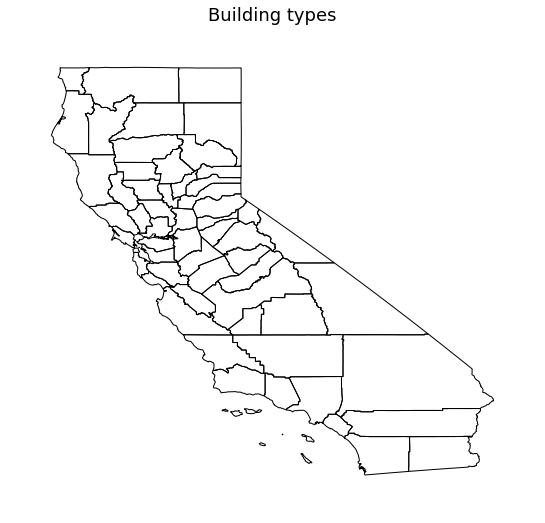

In [10]:
file_name = 'california_counties.json'
gpd_ca_counties = gpd.read_file(file_name)
geoplot.polyplot(gpd_ca_counties, figsize=(12, 9))
plt.title('Building types',fontsize=18)
plt.show()

In [18]:
import random
Popu_each_counties = [random.random()*1000 for x in range(len(gpd_ca_counties))]
Popu_each_counties

[758.3311299042012,
 497.9721512963686,
 582.5587383276437,
 384.73748924631167,
 905.2256404375887,
 223.22747885083072,
 384.72126275606297,
 294.11633187864095,
 582.4908674674047,
 664.5001131569524,
 691.8747438237275,
 479.04044072736065,
 639.9669725009761,
 768.9298161072084,
 906.9276920302162,
 711.3220728391466,
 884.9915840262776,
 264.30681269072875,
 205.30103807451604,
 621.6373473977247,
 389.1027457891375,
 461.96209859154845,
 982.5509339429482,
 724.9939612523441,
 547.029264222851,
 75.04431758444063,
 612.8890141548109,
 472.46295664320195,
 777.9041296975106,
 41.727623811342205,
 710.6655997072448,
 868.7915599486064,
 13.657876064163688,
 378.84757273755645,
 540.8141792961811,
 363.617530178001,
 373.26713198957674,
 170.87367996142,
 421.88921249685416,
 668.9681194500405,
 944.0206128224572,
 529.6711453570307,
 494.28454252437837,
 851.3913988109886,
 8.406889224609081,
 144.42306940334748,
 595.5176158535326,
 382.8986197031157,
 916.1468086351049,
 382.075

/Users/congzhang/virtualenvs/LDRD_env3/lib/python3.7/site-packages/geoplot/geoplot.py:1793: FutureWarning:

    You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.



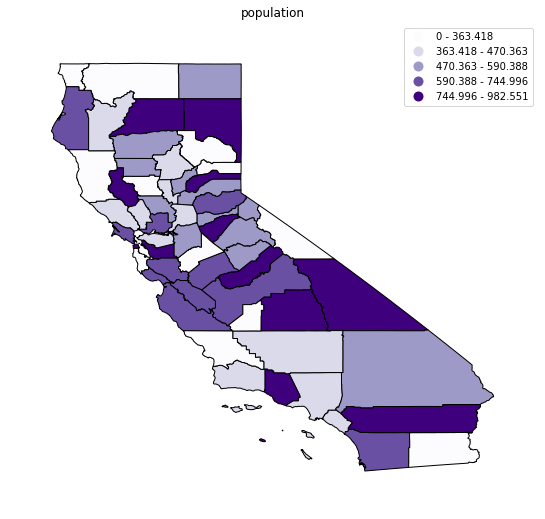

In [20]:

# for keyword in ['population','trips','vmt','emission']:
for keyword in ['population']:
#     Popu_each_counties = get_county_level_result_from_emfac(df_all_raw,keyword)
    scheme = mapclassify.Quantiles(Popu_each_counties, k=5)
    geoplot.choropleth(
        gpd_ca_counties, hue=Popu_each_counties, scheme=scheme,
        cmap='Purples', legend=True, figsize=(12,9)
    )
    plt.title(keyword)
    plt.show()

/Users/congzhang/virtualenvs/LDRD_env3/lib/python3.7/site-packages/geoplot/geoplot.py:592: UserWarning:

Cannot set "figsize" when passing an "ax" to the plot. To remove this warning omit the "figsize" parameter.



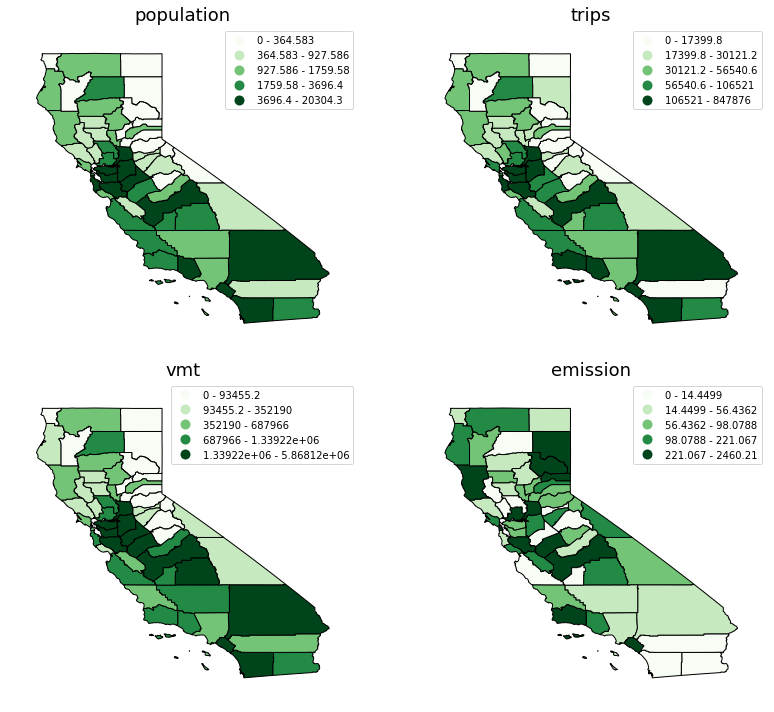

In [24]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
count = 1
for keyword in ['population','trips','vmt','emission']:
    ax=axes[int((count-1)/2),((count-1)%2)]
    
    Popu_each_counties = get_county_level_result_from_emfac(df_all_raw,keyword)
    scheme = mapclassify.Quantiles(Popu_each_counties, k=5)
    geoplot.choropleth(
        gpd_ca_counties, hue=Popu_each_counties, scheme=scheme,
        cmap='Greens', legend=True, figsize=(6,4),ax=ax)
    ax.set_title(keyword,fontsize=18)
    count = count + 1
plt.tight_layout()

/Users/congzhang/virtualenvs/LDRD_env3/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning:


/Users/congzhang/virtualenvs/LDRD_env3/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning:




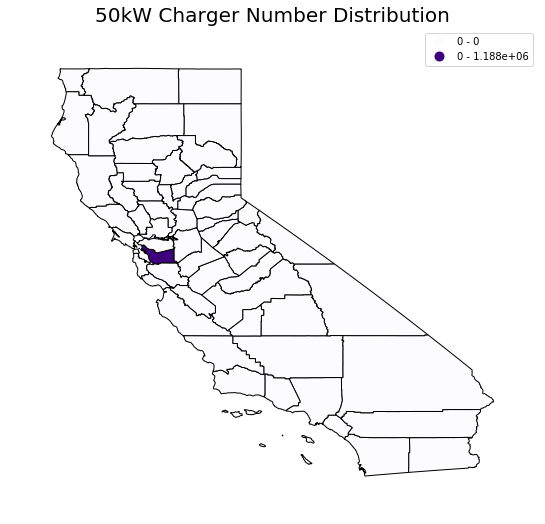

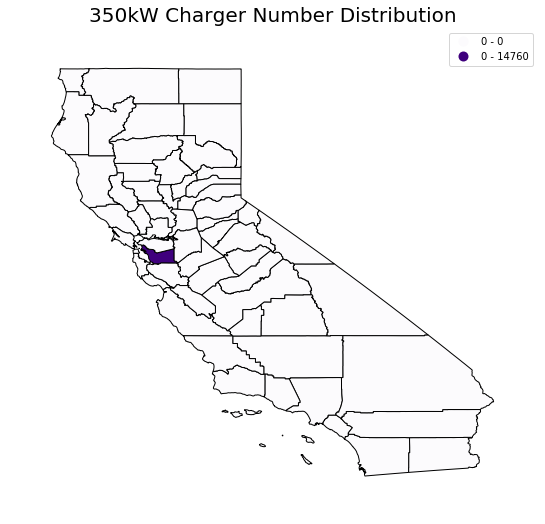

In [25]:
df_chargers = pd.DataFrame()   
df_chargers['county'] = gpd_ca_counties['name'].tolist()

for keyword in ['50kW','350kW']:
    Popu_each_counties = get_county_level_chargers_from_hevipo(df_data_result,keyword)
    df_chargers[keyword] = Popu_each_counties    
    scheme = mapclassify.Quantiles(Popu_each_counties, k=5)
    geoplot.choropleth(
        gpd_ca_counties, hue=Popu_each_counties, scheme=scheme,
        cmap='Purples', legend=True, figsize=(12,9)
    )
    plt.title(keyword + ' Charger Number Distribution', fontsize=20)
    plt.show()
    
df_chargers.to_csv('CA_county_chargers.csv')

In [2]:
# for debug

data = pd.read_csv('../data/emfac/AllCounty_AllllInfo_Annual_2020_2030.csv')

In [4]:
print(len(data))
data.head()

734712


calendar_year      sub_area vehicle_class  hour pollutant  emission  \
0           2020  Alameda (SF)           LDA     1      Fuel  8.189115   
1           2020  Alameda (SF)           LDA     2      Fuel  2.677435   
2           2020  Alameda (SF)           LDA     3      Fuel  2.016280   
3           2020  Alameda (SF)           LDA     4      Fuel  1.193047   
4           2020  Alameda (SF)           LDA     5      Fuel  3.407818   

             vmt     population         trips  
0  248145.347277  618438.670445  32573.804592  
1   79593.790636  618438.670445  15899.118908  
2   60865.839898  618438.670445   5816.750820  
3   35114.907633  618438.670445   6592.317596  
4  100662.735216  618438.670445  10857.934864

In [8]:
data_county_class_year = data.loc[(data.sub_area == 'Alameda (SF)') &
                                (data.vehicle_class == 'LDA') &
                                (data.calendar_year == 2020)]
print(len(data_county_class_year))
data_county_class_year.head()

24


calendar_year      sub_area vehicle_class  hour pollutant  emission  \
0           2020  Alameda (SF)           LDA     1      Fuel  8.189115   
1           2020  Alameda (SF)           LDA     2      Fuel  2.677435   
2           2020  Alameda (SF)           LDA     3      Fuel  2.016280   
3           2020  Alameda (SF)           LDA     4      Fuel  1.193047   
4           2020  Alameda (SF)           LDA     5      Fuel  3.407818   

             vmt     population         trips  
0  248145.347277  618438.670445  32573.804592  
1   79593.790636  618438.670445  15899.118908  
2   60865.839898  618438.670445   5816.750820  
3   35114.907633  618438.670445   6592.317596  
4  100662.735216  618438.670445  10857.934864

In [15]:
a = []
for x in data_county_class_year['emission'].values:
#     a.append(np.ones(24)*x/24)
    a = np.hstack((a,np.ones(24)*x/24))

In [17]:
len(a)/24

24.0

In [12]:
a[0]

array([0.34121312])